<a href="https://colab.research.google.com/github/mebirtukan/Data-Science-Project-Loan-Default-Detection/blob/main/DataScience_Project_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Project Challenge: Loan Default Prediction  

This notebook shows the lifecyce of Data Science project with machine learning approach.

The Project is a part of Data Science Coding Challenge from coursera.

The main goal of the project is to  predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience. Machine Learning approaches can be employed to tackle this problem.

In this notebook we used RandomForest classifier to predict which individual is at risk of paying the loan. The full cycle of Data science is shown step by step.

Download the dataset from: https://www.coursera.org/learn/data-science-coding-challenge-loan-default-prediction/programming/L0GW8/loan-default-prediction-coding-challenge

This dataset contains information about loan predicition, including various attributes related to applicants and whether their loan applications were Default or not. The dataset is designed for predictive modeling tasks, specifically for predicting whether a loan application will be Default or not based on the provided features.
# The stepts are:
**Exploratory Data Analysis (EDA):** Conduct exploratory data analysis to understand the relationships between different variables, identify patterns, and gain insights. Visualization tools can be helpful in this phase.

**Feature Engineering: **Create new features or modify existing ones to improve the model's performance. This might involve transforming variables, creating interaction terms, or encoding categorical variables.

**Data Splitting:** Split the dataset into training and testing sets. The training set is used to train the model, and the testing set is used to evaluate its performance.

**Model Selection:** Choose an appropriate machine learning algorithm for your problem. Common algorithms for loan prediction include logistic regression, random forests, and Decision Tree.

**Model Training:** Train the selected model using the training dataset. This involves feeding the algorithm the features and corresponding labels and letting it learn the patterns in the data.

**Model Evaluation:** Evaluate the model's performance on the testing dataset using appropriate metrics such as confusion matrix, precision, recall, F1 score etc.


In [2]:
# @title # Import required packages

# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# @title Data Description
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


In [4]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


In [6]:
# @title #Explore, Clean, Validate, and Visualize the Data
train_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [7]:
# @title Check NULL  values and remove
train_df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [8]:
# @title Drop nan value in the Default column

train_df=train_df.dropna(subset='Default')


Default
0    225694
1     29653
dtype: int64


<Axes: >

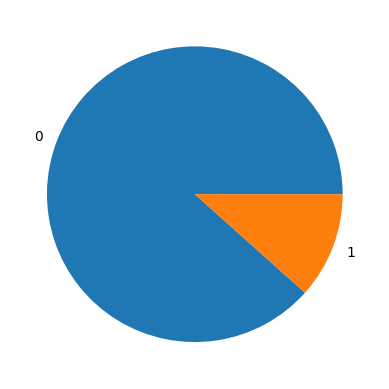

In [9]:
# @title #Check the distribution of target values in the class and present the distribution in pie chart This value shows that 88.3% of the loan will be Default and 11.6% is not.

Distribution=train_df.value_counts('Default')
print(Distribution)

Distribution.plot.pie()

<ipython-input-10-ce4df3c76bc2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=CORR.corr()


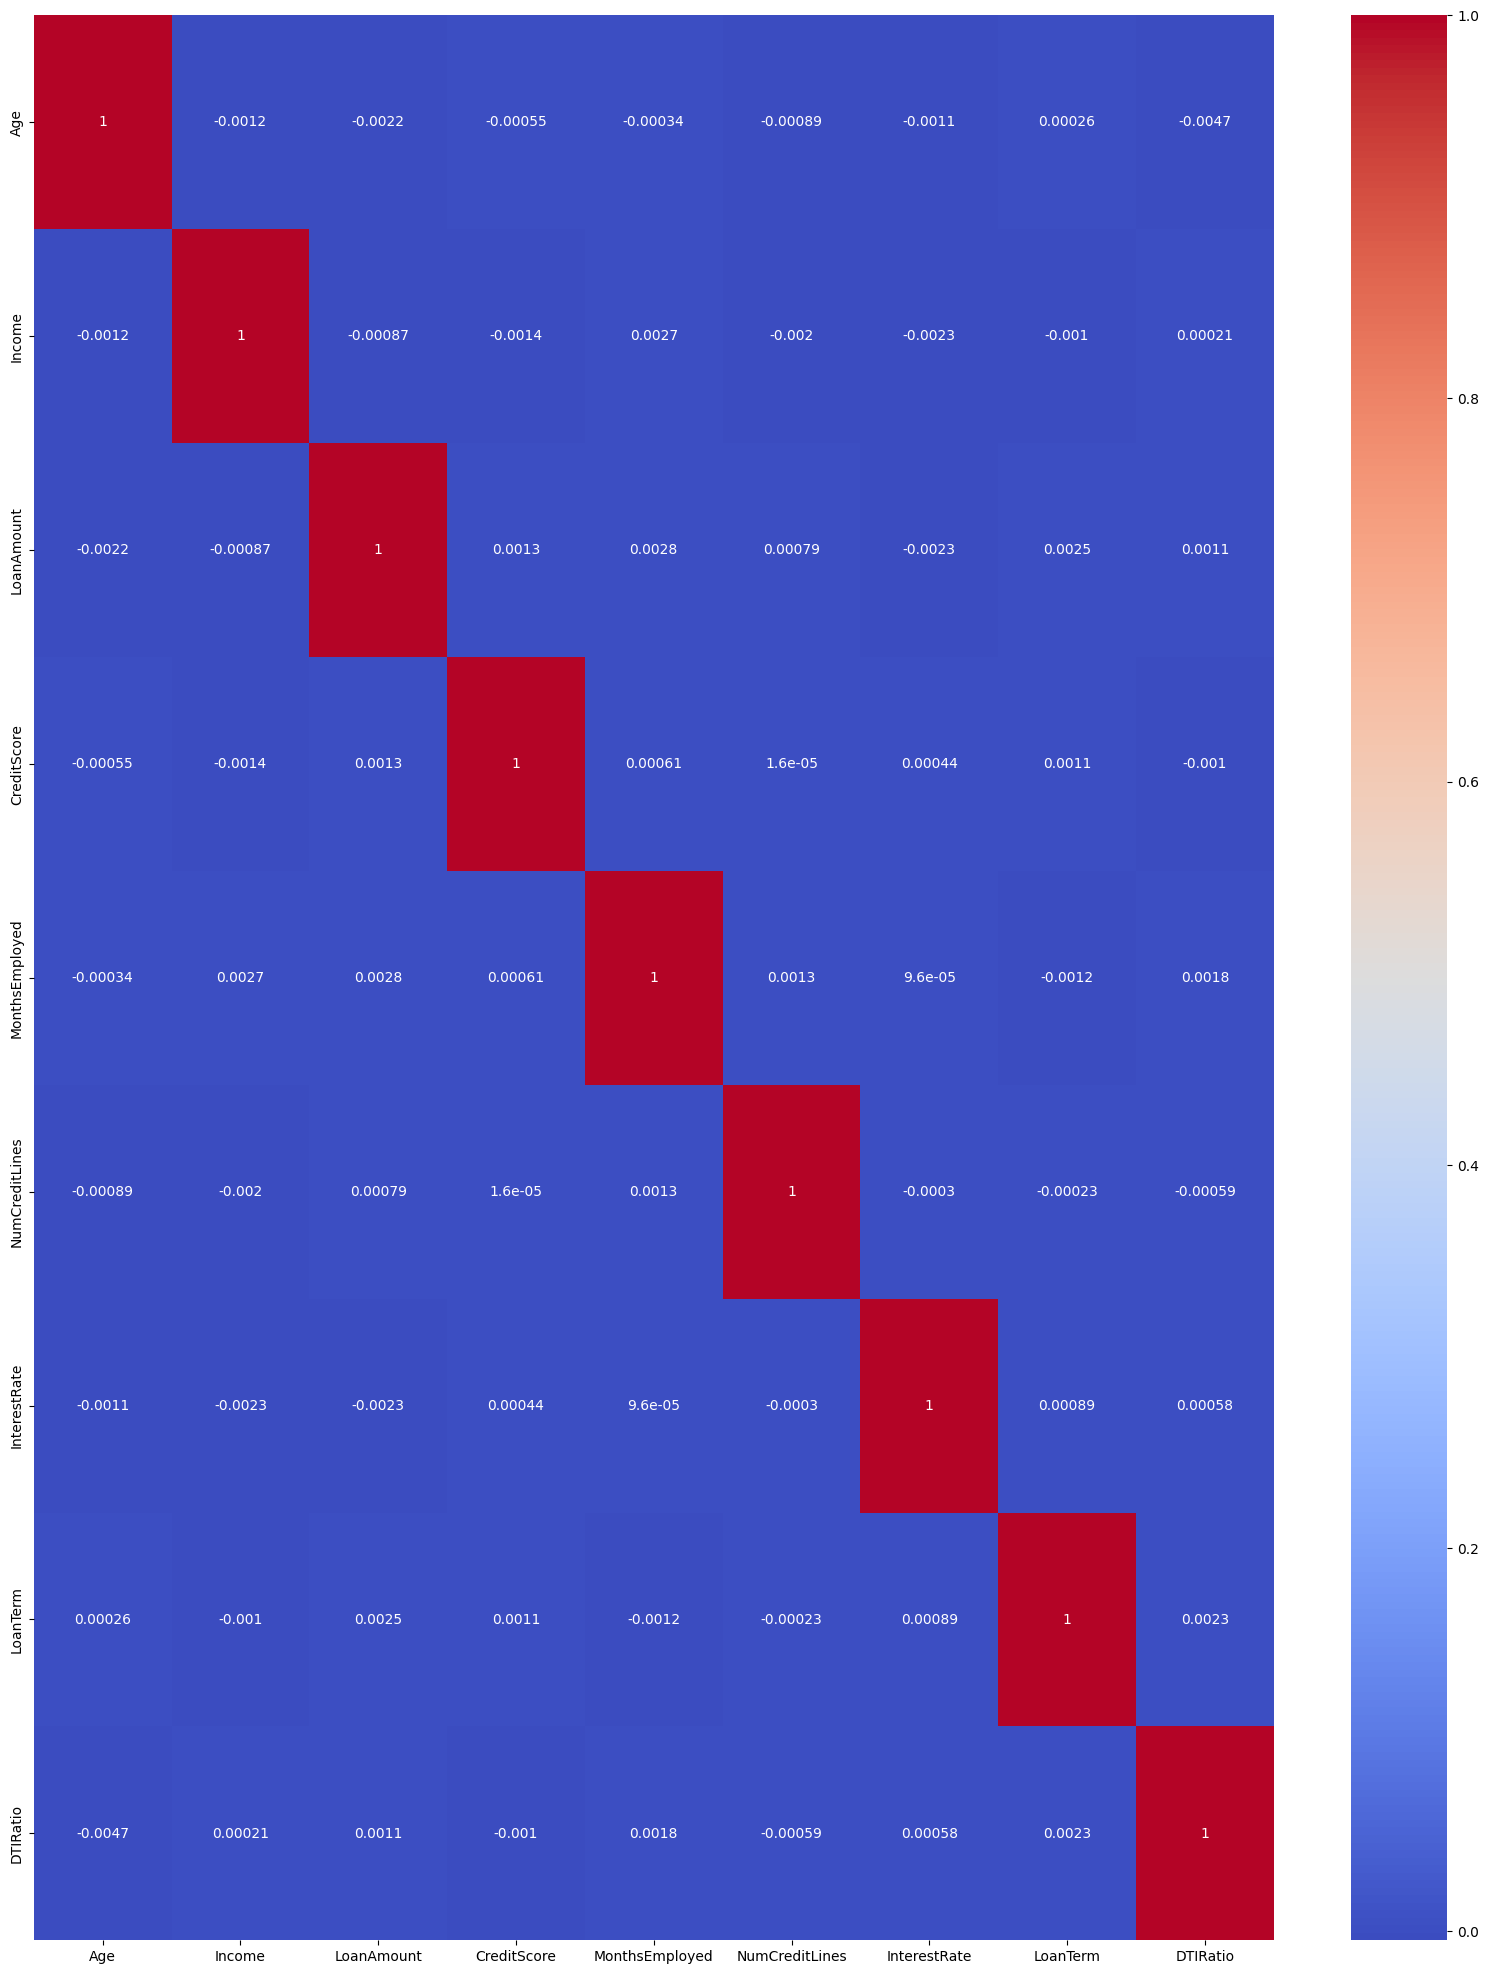

In [10]:
# @title PLOT CORRELATION
# Visualize the correlation between features
CORR=train_df.drop(['LoanID', 'Default'], axis=1)
corr=CORR.corr()
plt.figure(figsize = (20, 25))
sns.heatmap(corr, cmap='coolwarm', annot= True)
plt.show()

In [11]:
# @title Select columns with OBJECT Dtype
Object_values=train_df.select_dtypes(include='object').columns
Object_values

Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [12]:
# @title Catagorical to numerical by LabelEnabler to convert catagorical or string values into numerical
cols=['EmploymentType','Education','MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose','HasCoSigner']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

for C in cols:
    train_df[C]=LE.fit_transform(train_df[C])

# And Check the Dtype
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  int64  
 11  EmploymentType  255347 non-null  int64  
 12  MaritalStatus   255347 non-null  int64  
 13  HasMortgage     255347 non-null  int64  
 14  HasDependents   255347 non-null  int64  
 15  LoanPurpose     255347 non-null  int64  
 16  HasCoSigner     255347 non-null  int64  
 17  Default   

<ipython-input-13-6f6aba54d7dc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[c], color='red')


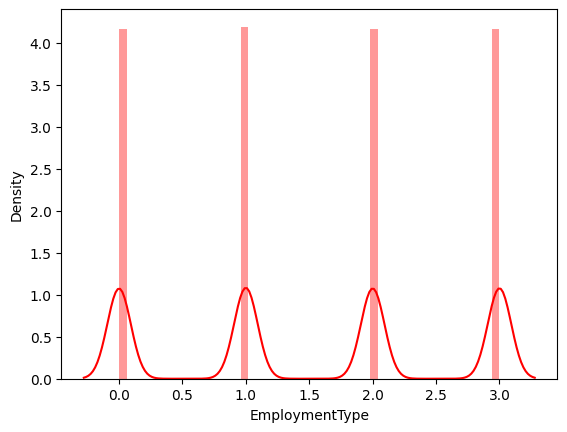

<ipython-input-13-6f6aba54d7dc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[c], color='red')


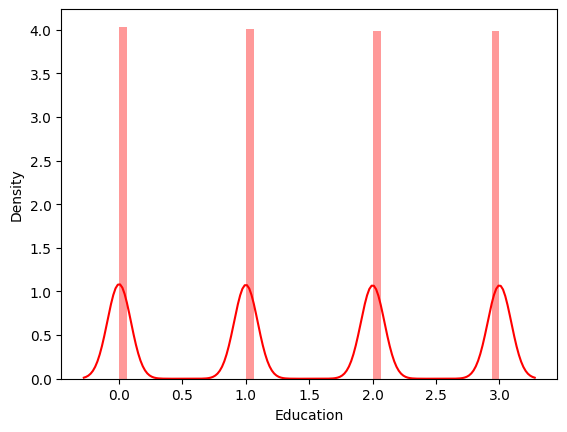

<ipython-input-13-6f6aba54d7dc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[c], color='red')


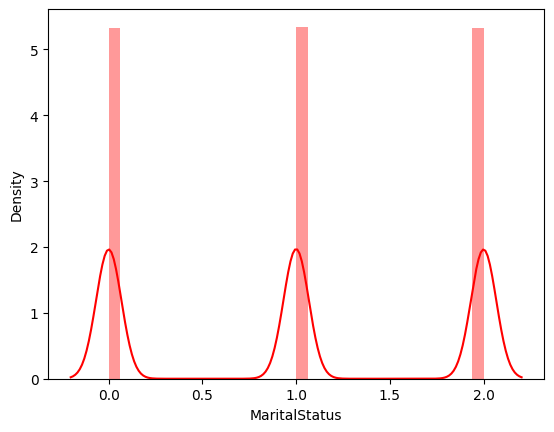

<ipython-input-13-6f6aba54d7dc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[c], color='red')


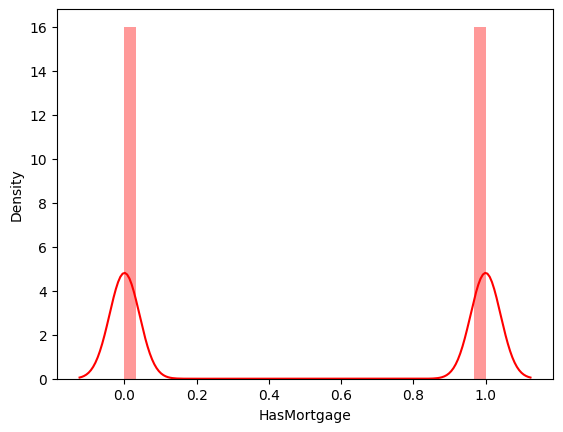

<ipython-input-13-6f6aba54d7dc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[c], color='red')


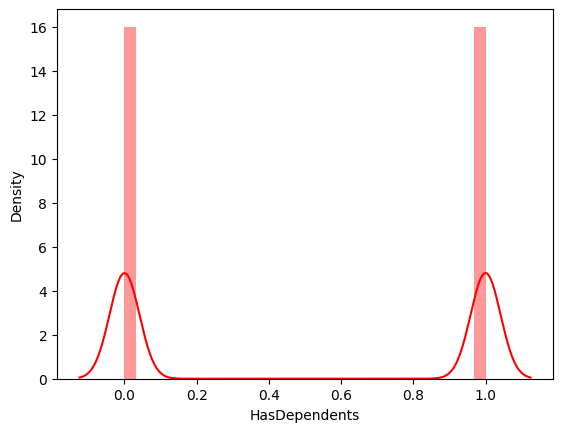

<ipython-input-13-6f6aba54d7dc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[c], color='red')


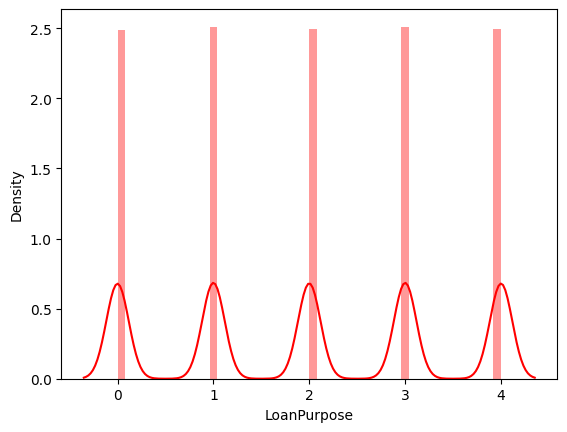

<ipython-input-13-6f6aba54d7dc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[c], color='red')


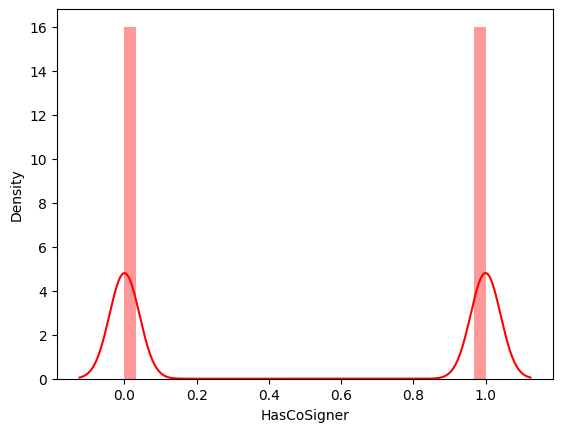

In [13]:
# @title Visualize the distributions of the feature

for c in cols:
  sns.distplot(train_df[c], color='red')
  plt.show()

In [14]:
# @title Check for NAN values in a column and drop them in from all columns or replace them with zero
train_df.Default.isna()
for i in cols:
  train_df=train_df.dropna(subset=i)
  test_df=train_df.dropna(subset=i)


              precision    recall  f1-score   support

           0       1.00      0.88      0.94    255294
           1       0.00      0.81      0.00        53

    accuracy                           0.88    255347
   macro avg       0.50      0.85      0.47    255347
weighted avg       1.00      0.88      0.94    255347

[[0.88 0.12]
 [0.19 0.81]]


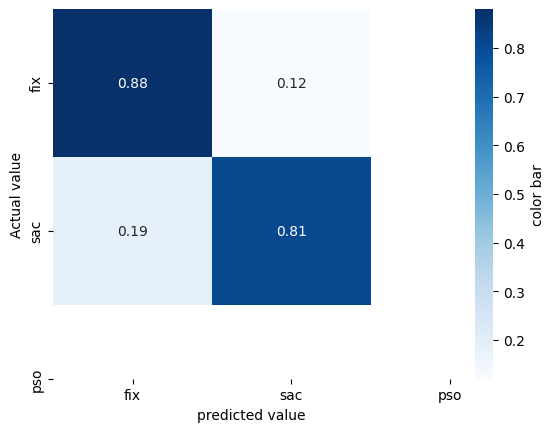

In [15]:
# @title Logistic Regression Model
LR=LogisticRegression()
LR.fit(train_df.drop(['LoanID'], axis=1), train_df.Default)
y_lr=LR.predict(test_df.drop(['LoanID'], axis=1))

CM_LR=confusion_matrix(y_lr, train_df.Default)
print(classification_report(y_lr, train_df.Default))
cm_normalized=np.round(CM_LR/np.sum(CM_LR, axis=1).reshape(-1, 1), 2)
print(cm_normalized)
sns.heatmap(cm_normalized, cmap='Blues', annot=True, cbar_kws={"orientation": "vertical", "label": "color bar"}, xticklabels=['fix','sac','pso'], yticklabels=['fix', 'sac', 'pso'])
plt.xlabel("predicted value")
plt.ylabel("Actual value")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    225694
           1       1.00      1.00      1.00     29653

    accuracy                           1.00    255347
   macro avg       1.00      1.00      1.00    255347
weighted avg       1.00      1.00      1.00    255347

[[1. 0.]
 [0. 1.]]


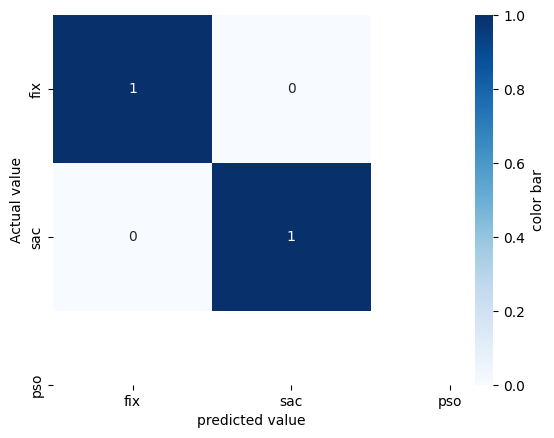

In [25]:
# @title Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf.fit(train_df.drop(['LoanID'], axis=1), train_df.Default)
# Make predictions on the test data

y_DT=clf.predict(test_df.drop(['LoanID'], axis=1))

CM=confusion_matrix(y_DT, train_df.Default)
print(classification_report(y_DT, train_df.Default))
cm_normalized=np.round(CM/np.sum(CM, axis=1).reshape(-1, 1), 2)
print(cm_normalized)
sns.heatmap(cm_normalized, cmap='Blues', annot=True, cbar_kws={"orientation": "vertical", "label": "color bar"}, xticklabels=['fix','sac','pso'], yticklabels=['fix', 'sac', 'pso'])
plt.xlabel("predicted value")
plt.ylabel("Actual value")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    225694
           1       1.00      1.00      1.00     29653

    accuracy                           1.00    255347
   macro avg       1.00      1.00      1.00    255347
weighted avg       1.00      1.00      1.00    255347

[[1. 0.]
 [0. 1.]]


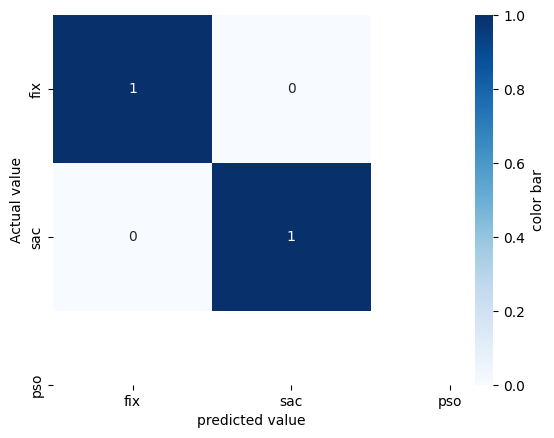

In [26]:
# @title  RandomForest Classifier

RF=RandomForestClassifier(n_estimators=10)

RF.fit(train_df.drop(['LoanID'], axis=1), train_df.Default)
# @title MODEL PREDICTION
y_pre=RF.predict_proba(test_df.drop(['LoanID'], axis=1)) [:, 1]
y_pre
y_pred=RF.predict(test_df.drop(['LoanID'], axis=1))
# Model analysis
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(y_pred, train_df.Default)
print(classification_report(y_pred, train_df.Default))
cm_normalized=np.round(CM/np.sum(CM, axis=1).reshape(-1, 1), 2)
print(cm_normalized)
sns.heatmap(cm_normalized, cmap='Blues', annot=True, cbar_kws={"orientation": "vertical", "label": "color bar"}, xticklabels=['fix','sac','pso'], yticklabels=['fix', 'sac', 'pso'])
plt.xlabel("predicted value")
plt.ylabel("Actual value")
plt.show()

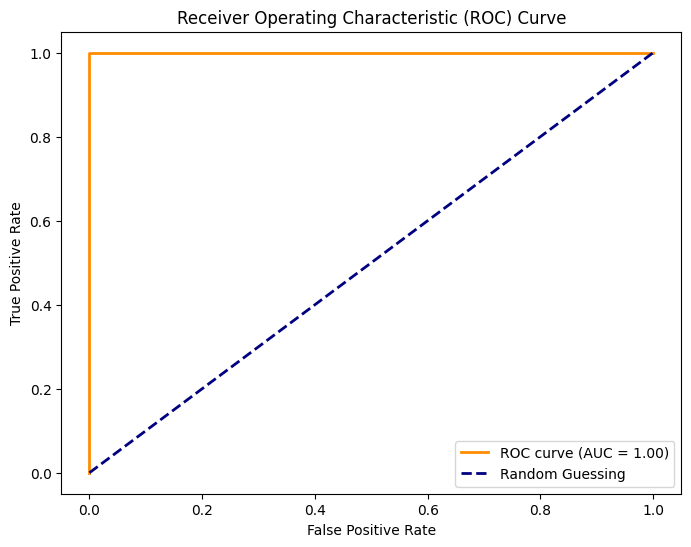

In [27]:
# Compute ROC curve and AUC for RF Classifier
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_pred, train_df.Default)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [28]:
# @title Prepare the output in two columns LoanID from the original test fiel  and predicted probability value form the model output
pred_df=pd.DataFrame({'LoanID':test_df['LoanID'], 'Default':train_df['Default'], 'PRED_PROB':y_pre})

In [29]:
pred_df.to_csv('conertto_csv.csv', index=False) # index =False is to remove the second index value before the column starts ... 0,1,2,3,4

In [31]:
pred_df

,LoanID,Default,PRED_PROB
0,I38PQUQS96,0,0.0
1,HPSK72WA7R,0,0.0
2,C1OZ6DPJ8Y,1,1.0
3,V2KKSFM3UN,0,0.0
4,EY08JDHTZP,0,0.0
...,...,...,...
255342,8C6S86ESGC,0,0.0
255343,98R4KDHNND,1,1.0
255344,XQK1UUUNGP,0,0.0
255345,JAO28CPL4H,0,0.0
